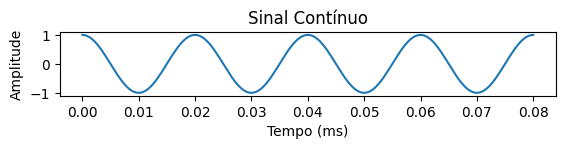

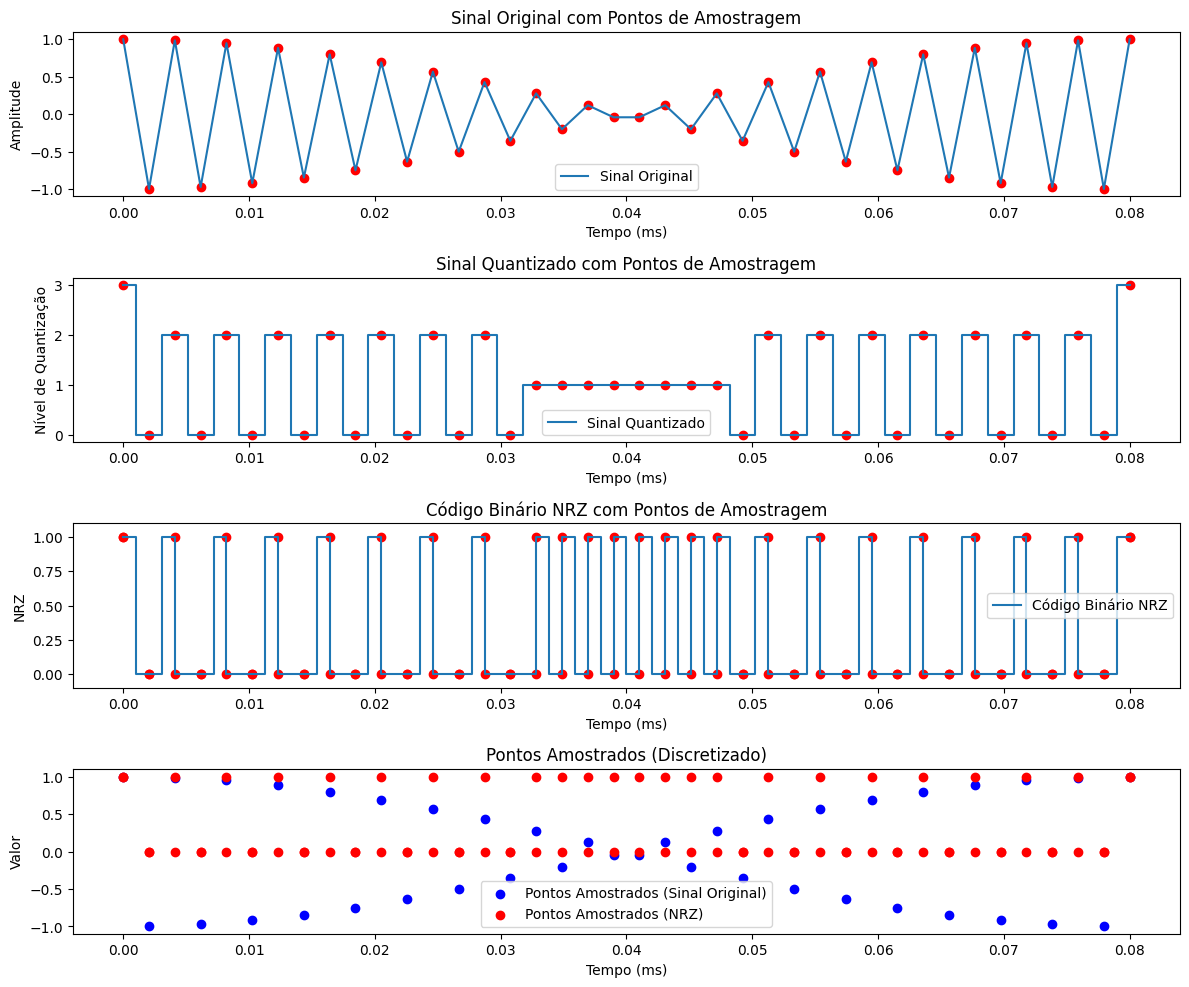

Código binário de todas as amostras (NRZ):
11001000100010001000100010001000010101010101010100100010001000100010001000100011
Primeiros 10 valores do código binário:
t=0.00 ms -> Quantização: 3 -> Código Binário: 11
t=0.00 ms -> Quantização: 0 -> Código Binário: 00
t=0.00 ms -> Quantização: 2 -> Código Binário: 10
t=0.01 ms -> Quantização: 0 -> Código Binário: 00
t=0.01 ms -> Quantização: 2 -> Código Binário: 10
t=0.01 ms -> Quantização: 0 -> Código Binário: 00
t=0.01 ms -> Quantização: 2 -> Código Binário: 10
t=0.01 ms -> Quantização: 0 -> Código Binário: 00
t=0.02 ms -> Quantização: 2 -> Código Binário: 10
t=0.02 ms -> Quantização: 0 -> Código Binário: 00


In [10]:
import matplotlib.pyplot as plt
import numpy as np

def quantizar_sinal(sinal, num_niveis):
    valor_min = np.min(sinal)
    valor_max = np.max(sinal)
    niveis_quant = np.linspace(valor_min, valor_max, num_niveis)
    sinal_quantizado = np.digitize(sinal, niveis_quant) - 1
    return sinal_quantizado, niveis_quant

def gerar_codigo_binario(sinal_quantizado, num_niveis):
    num_bits = int(np.ceil(np.log2(num_niveis)))
    codigo_binario = [np.binary_repr(nivel, width=num_bits) for nivel in sinal_quantizado]
    return codigo_binario

# Caracteristica do sinal
amplitude = 1.0  
frequencia = 10.0 * (10**3)  
periodos = 80.0 * (10**-3)  
taxa_amostragem = 2
num_niveis = 4  

amostras_por_segmento = int(periodos / (taxa_amostragem * 10**-3))
tempo = np.linspace(0, periodos, amostras_por_segmento)
sinal = amplitude * np.cos(2 * np.pi * frequencia * tempo)

# Quantização do sinal
sinal_quantizado, niveis_quant = quantizar_sinal(sinal, num_niveis)

# gerador código binário
codigo_binario = gerar_codigo_binario(sinal_quantizado, num_niveis)

# dados plotagem do código binário (NRZ)
grafico_binario = []
tempo_grafico = []
for i in range(len(codigo_binario)):
    for bit in codigo_binario[i]:
        if bit == '1':
            grafico_binario.append(1)
        else:
            grafico_binario.append(0)
        tempo_grafico.append(tempo[i])


# plot do sinal original sem amostras
tempo_alta_resolucao = np.linspace(0, periodos, 200)  # Alta resolução no tempo
sinal_continuo = amplitude * np.cos(2 * np.pi * frequencia * tempo_alta_resolucao)

plt.subplot(5, 1, 5)
plt.plot(tempo_alta_resolucao, sinal_continuo, label='Sinal Contínuo')
plt.xlabel('Tempo (ms)')
plt.ylabel('Amplitude')
plt.title('Sinal Contínuo')


# plot do sinal original com pontos de amostragem
plt.figure(figsize=(12, 12))

plt.subplot(5, 1, 1)
plt.plot(tempo, sinal, label='Sinal Original')
plt.scatter(tempo, sinal, color='red')  
plt.xlabel('Tempo (ms)')
plt.ylabel('Amplitude')
plt.title('Sinal Original com Pontos de Amostragem')
plt.legend()

# plot do sinal quantizado com pontos de amostragem
plt.subplot(5, 1, 2)
plt.step(tempo, sinal_quantizado, where='mid', label='Sinal Quantizado')
plt.scatter(tempo, sinal_quantizado, color='red')  
plt.xlabel('Tempo (ms)')
plt.ylabel('Nível de Quantização')
plt.title('Sinal Quantizado com Pontos de Amostragem')
plt.legend()

# plot do código binário NRZ com pontos de amostragem
plt.subplot(5, 1, 3)
plt.step(tempo_grafico, grafico_binario, where='mid', label='Código Binário NRZ')
plt.scatter(tempo_grafico, grafico_binario, color='red')  # Adiciona pequenas bolas nos pontos de amostragem
plt.xlabel('Tempo (ms)')
plt.ylabel('NRZ')
plt.title('Código Binário NRZ com Pontos de Amostragem')
plt.ylim(-0.1, 1.1)
plt.legend()

# Gráfico discretizado (apenas os pontos)
plt.subplot(5, 1, 4)
plt.scatter(tempo, sinal, color='blue', label='Pontos Amostrados (Sinal Original)')
plt.scatter(tempo_grafico, grafico_binario, color='red', label='Pontos Amostrados (NRZ)')
plt.xlabel('Tempo (ms)')
plt.ylabel('Valor')
plt.title('Pontos Amostrados (Discretizado)')
plt.legend()


plt.tight_layout()
plt.show()

# Exibir o código binário 
codigo_binario_completo = ''.join([str(bit) for bit in grafico_binario])
print("Código binário de todas as amostras (NRZ):")
print(codigo_binario_completo)

# Exibir os primeiros valores do código binário para verificação
print("Primeiros 10 valores do código binário:")
for i in range(min(10, len(codigo_binario))):
    print(f"t={tempo[i]:.2f} ms -> Quantização: {sinal_quantizado[i]} -> Código Binário: {codigo_binario[i]}")


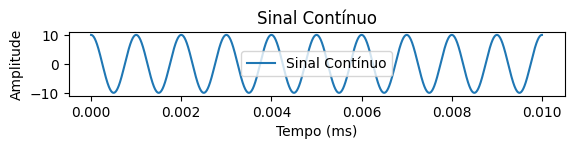

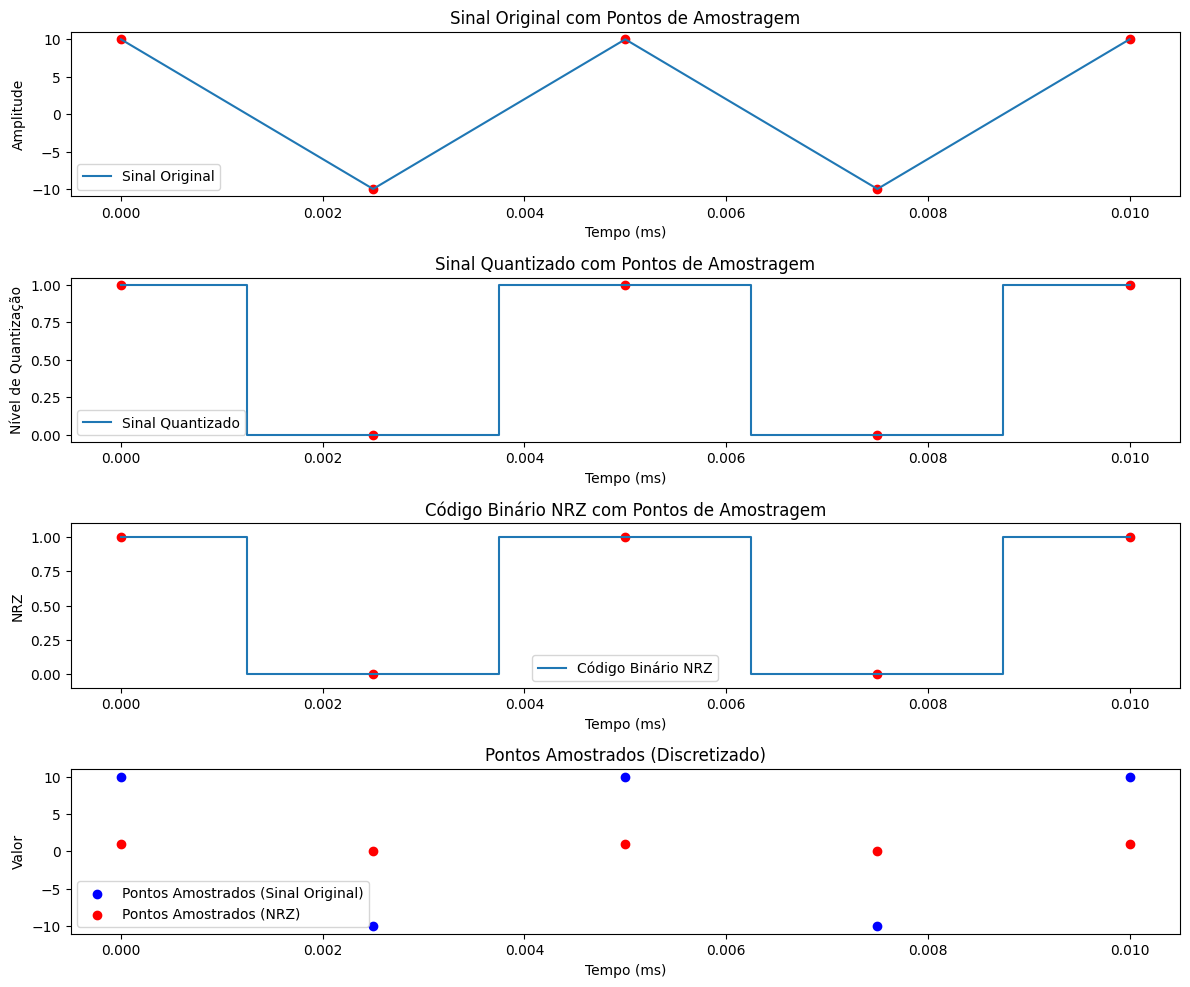

Código binário de todas as amostras (NRZ):
10101
Primeiros 10 valores do código binário:
t=0.00 ms -> Quantização: 1 -> Código Binário: 1
t=0.00 ms -> Quantização: 0 -> Código Binário: 0
t=0.01 ms -> Quantização: 1 -> Código Binário: 1
t=0.01 ms -> Quantização: 0 -> Código Binário: 0
t=0.01 ms -> Quantização: 1 -> Código Binário: 1


In [25]:
import matplotlib.pyplot as plt
import numpy as np

def quantizar_sinal(sinal, num_niveis):
    valor_min = np.min(sinal)
    valor_max = np.max(sinal)
    niveis_quant = np.linspace(valor_min, valor_max, num_niveis)
    sinal_quantizado = np.digitize(sinal, niveis_quant) - 1
    return sinal_quantizado, niveis_quant

def gerar_codigo_binario(sinal_quantizado):
    codigo_binario = [format(nivel, '01b') for nivel in sinal_quantizado]
    return codigo_binario

# características do sinal
amplitude = 10.0  
frequencia = 1.0 * 1000  
periodos = 10.0 * 1e-3  
taxa_amostragem = 2 * 1e-3  

num_niveis = 2  # Número de níveis de quantização para NRZ é 2

amostras_por_segmento = int(periodos / taxa_amostragem)
tempo = np.linspace(0, periodos, amostras_por_segmento)
sinal = amplitude * np.cos(2 * np.pi * frequencia * tempo)

# Quantização do sinal
sinal_quantizado, niveis_quant = quantizar_sinal(sinal, num_niveis)

# Geração do código binário
codigo_binario = gerar_codigo_binario(sinal_quantizado)

# Preparação dos dados para plotagem do código binario
grafico_binario = []
tempo_grafico = []
for i in range(len(codigo_binario)):
    for bit in codigo_binario[i]:
        grafico_binario.append(int(bit))
        tempo_grafico.append(tempo[i])

# Plot do sinal contínuo (alta resolução)
tempo_alta_resolucao = np.linspace(0, periodos, 10000)  
sinal_continuo = amplitude * np.cos(2 * np.pi * frequencia * tempo_alta_resolucao)

plt.subplot(5, 1, 5)
plt.plot(tempo_alta_resolucao, sinal_continuo, label='Sinal Contínuo')
plt.xlabel('Tempo (ms)')
plt.ylabel('Amplitude')
plt.title('Sinal Contínuo')
plt.legend()


# Plot do sinal original 
plt.figure(figsize=(12, 12))

plt.subplot(5, 1, 1)
plt.plot(tempo, sinal, label='Sinal Original')
plt.scatter(tempo, sinal, color='red')  
plt.xlabel('Tempo (ms)')
plt.ylabel('Amplitude')
plt.title('Sinal Original com Pontos de Amostragem')
plt.legend()

# Plot do sinal quantizado 
plt.subplot(5, 1, 2)
plt.step(tempo, sinal_quantizado, where='mid', label='Sinal Quantizado')
plt.scatter(tempo, sinal_quantizado, color='red')  
plt.xlabel('Tempo (ms)')
plt.ylabel('Nível de Quantização')
plt.title('Sinal Quantizado com Pontos de Amostragem')
plt.legend()

# Plot do código binário NRZ 
plt.subplot(5, 1, 3)
plt.step(tempo_grafico, grafico_binario, where='mid', label='Código Binário NRZ')
plt.scatter(tempo_grafico, grafico_binario, color='red') 
plt.xlabel('Tempo (ms)')
plt.ylabel('NRZ')
plt.title('Código Binário NRZ com Pontos de Amostragem')
plt.ylim(-0.1, 1.1)
plt.legend()

# Gráfico discretizado (apenas os pontos)
plt.subplot(5, 1, 4)
plt.scatter(tempo, sinal, color='blue', label='Pontos Amostrados (Sinal Original)')
plt.scatter(tempo_grafico, grafico_binario, color='red', label='Pontos Amostrados (NRZ)')
plt.xlabel('Tempo (ms)')
plt.ylabel('Valor')
plt.title('Pontos Amostrados (Discretizado)')
plt.legend()



plt.tight_layout()
plt.show()

# Exibir o código binário de todas as amostras
codigo_binario_completo = ''.join([str(bit) for bit in grafico_binario])
print("Código binário de todas as amostras (NRZ):")
print(codigo_binario_completo)

# Exibir os primeiros valores do código binário 
print("Primeiros 10 valores do código binário:")
for i in range(min(10, len(codigo_binario))):
    print(f"t={tempo[i]:.2f} ms -> Quantização: {sinal_quantizado[i]} -> Código Binário: {codigo_binario[i]}")

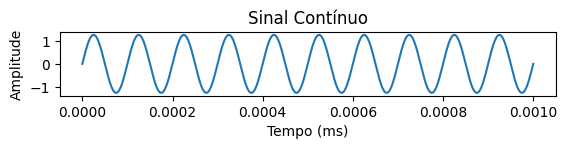

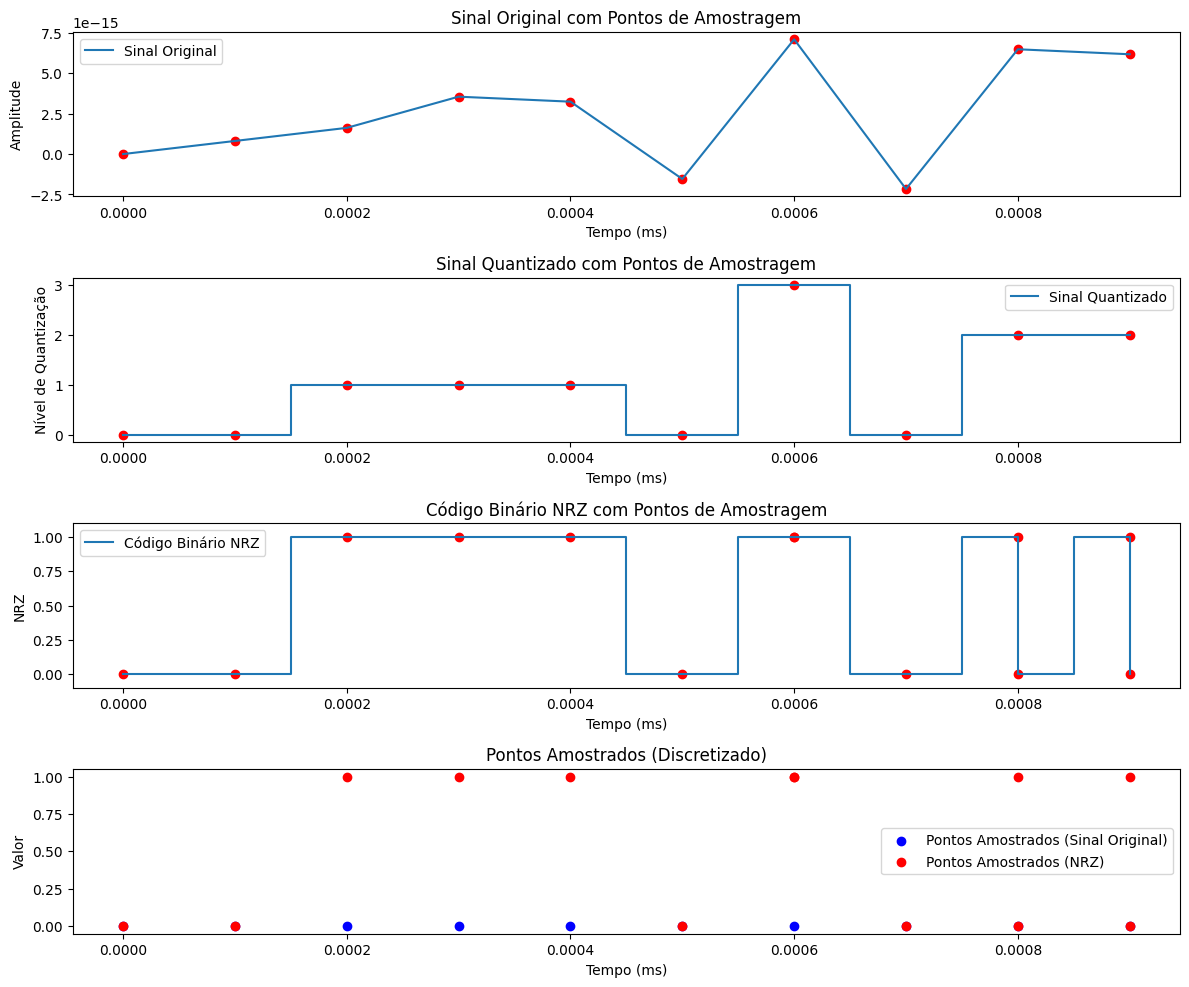

Código binário de todas as amostras (NRZ):
0011101101010
Primeiros 20 valores do código binário:
t=0.0000 ms -> Quantização: 0 -> Código Binário: 0
t=0.1000 ms -> Quantização: 0 -> Código Binário: 0
t=0.2000 ms -> Quantização: 1 -> Código Binário: 1
t=0.3000 ms -> Quantização: 1 -> Código Binário: 1
t=0.4000 ms -> Quantização: 1 -> Código Binário: 1
t=0.5000 ms -> Quantização: 0 -> Código Binário: 0
t=0.6000 ms -> Quantização: 3 -> Código Binário: 11
t=0.7000 ms -> Quantização: 0 -> Código Binário: 0
t=0.8000 ms -> Quantização: 2 -> Código Binário: 10
t=0.9000 ms -> Quantização: 2 -> Código Binário: 10


In [8]:
import matplotlib.pyplot as plt
import numpy as np

def quantizar_sinal(sinal, num_niveis):
    valor_min = np.min(sinal)
    valor_max = np.max(sinal)
    niveis_quant = np.linspace(valor_min, valor_max, num_niveis)
    sinal_quantizado = np.digitize(sinal, niveis_quant) - 1
    return sinal_quantizado, niveis_quant

def gerar_codigo_binario(sinal_quantizado):
    codigo_binario = [format(nivel, '01b') for nivel in sinal_quantizado]
    return codigo_binario

# Valores fixos das características do sinal
potencia = float(input('pot')) ##0.5  
frequencia = float(input('freq')) ##1.0 * 1000  
duracao = float(input('periodo')) ##10.0 * 1e-3  
taxa_amostragem = float(input('amostragem')) ##0.1 * 1e-3  

# Cálculo da amplitude a partir da potência
amplitude = 10**(potencia/10)

# Número de níveis de quantização 
num_niveis = 4

amostras_por_segmento = int(duracao / taxa_amostragem)
tempo = np.linspace(0, duracao, amostras_por_segmento, endpoint=False)
sinal = amplitude * np.sin(2 * np.pi * frequencia * tempo)

# Quantização do sinal
sinal_quantizado, niveis_quant = quantizar_sinal(sinal, num_niveis)



# Geração do código binário
codigo_binario = gerar_codigo_binario(sinal_quantizado)



# Preparação dos dados para plotagem do código binário 
grafico_binario = []
tempo_grafico = []
for i in range(len(codigo_binario)):
    for bit in codigo_binario[i]:
        grafico_binario.append(int(bit))
        tempo_grafico.append(tempo[i])

# Plot do sinal contínuo 
tempo_alta_resolucao = np.linspace(0, duracao, 10000)  # Alta resolução no tempo
sinal_continuo = amplitude * np.sin(2 * np.pi * frequencia * tempo_alta_resolucao)

plt.subplot(5, 1, 5)
plt.plot(tempo_alta_resolucao, sinal_continuo, label='Sinal Contínuo')
plt.xlabel('Tempo (ms)')
plt.ylabel('Amplitude')
plt.title('Sinal Contínuo')


# Plot do sinal original 
plt.figure(figsize=(12, 12))

plt.subplot(5, 1, 1)
plt.plot(tempo, sinal, label='Sinal Original')
plt.scatter(tempo, sinal, color='red')  
plt.xlabel('Tempo (ms)')
plt.ylabel('Amplitude')
plt.title('Sinal Original com Pontos de Amostragem')
plt.legend()

# Plot do sinal quantizado 
plt.subplot(5, 1, 2)
plt.step(tempo, sinal_quantizado, where='mid', label='Sinal Quantizado')
plt.scatter(tempo, sinal_quantizado, color='red')  
plt.xlabel('Tempo (ms)')
plt.ylabel('Nível de Quantização')
plt.title('Sinal Quantizado com Pontos de Amostragem')
plt.legend()

# Plot do código binário NRZ
plt.subplot(5, 1, 3)
plt.step(tempo_grafico, grafico_binario, where='mid', label='Código Binário NRZ')
plt.scatter(tempo_grafico, grafico_binario, color='red')  
plt.xlabel('Tempo (ms)')
plt.ylabel('NRZ')
plt.title('Código Binário NRZ com Pontos de Amostragem')
plt.ylim(-0.1, 1.1)
plt.legend()

# Gráfico discretizado (apenas os pontos)
plt.subplot(5, 1, 4)
plt.scatter(tempo, sinal, color='blue', label='Pontos Amostrados (Sinal Original)')
plt.scatter(tempo_grafico, grafico_binario, color='red', label='Pontos Amostrados (NRZ)')
plt.xlabel('Tempo (ms)')
plt.ylabel('Valor')
plt.title('Pontos Amostrados (Discretizado)')
plt.legend()



plt.tight_layout()
plt.show()

# Exibir o código binário de todas as amostras em uma única linha
codigo_binario_completo = ''.join([str(bit) for bit in grafico_binario])
print("Código binário de todas as amostras (NRZ):")
print(codigo_binario_completo)

# Exibir os primeiros valores do código binário 
print("Primeiros 20 valores do código binário:")
for i in range(min(20, len(codigo_binario))):
    print(f"t={tempo[i]*1e3:.4f} ms -> Quantização: {sinal_quantizado[i]} -> Código Binário: {codigo_binario[i]}")
